<h4> Download MNIST dataset, apply PCA from scratch. </h4>

Dataset Source: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

<h4><u>References:</u></h4>

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://www.askpython.com/python/examples/principal-component-analysis

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51

For plotting:
https://www.statology.org/scree-plot-python/

<br>

Note: TRY BLACKBOX IMPLEMENTATION

Link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_labelled = pd.read_csv('MNIST/mnist_train.csv')

In [3]:
data_labelled.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label = data_labelled['label']
data = data_labelled.drop('label', axis=1)

<h5> Data Scaling not required, since all features are of same 0-255 'pixel' values </h5>

In [5]:
# Make it a numpy 2D Array
data = np.array(data)

In [6]:
print(f"Range of Pixel values: ({data.min()}, {data.max()})")

Range of Pixel values: (0, 255)


In [7]:
print(f"Number of Images: {data.shape[0]} \nNumber of Pixels per Image: {data.shape[1]}")

Number of Images: 60000 
Number of Pixels per Image: 784


In [8]:
def GetImage(data, img_no):
    '''
    *** Parameters ***
        data : MNIST CSV Dataset from source mentioned at top
        img_no : Index of the image in data
        
    *** Returns ***
        label : Label of the image
        matrix : Matrix with 28x28 pixel values
    '''
    
    matrix = []
    pixel = 1

    for i in range(0, 28):
        tmp = []
        row_len = 0

        while row_len < 28:
            tmp.append(data.iloc[img_no, pixel])
            pixel += 1
            row_len += 1

        matrix.append(tmp)
        
    return (data.iloc[img_no, 0], matrix)

Label: 5


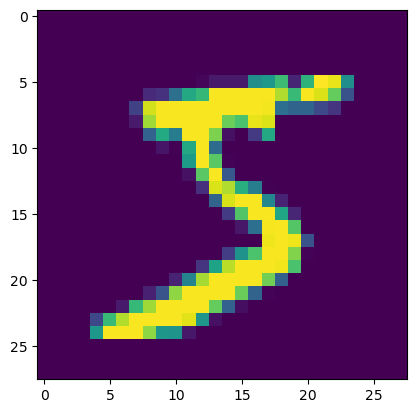

In [9]:
img = GetImage(data_labelled, img_no=0)

print("Label:", img[0])
plt.imshow(img[1], aspect=1)
plt.show()

In [10]:
# Center columns by subtracting by Mean
# In this case, no significant difference by centering the data.

# data_centered = data - np.mean(data, axis=0)

In [11]:
# If rowvar is True (default), then each row represents a variable, with observations in the columns
covariance = np.cov(data, rowvar=False)

covariance.shape

(784, 784)

In [25]:
# np.eigh v/s np.eig: https://stackoverflow.com/questions/45434989/numpy-difference-between-linalg-eig-and-linalg-eigh
eigen_values, eigen_vectors = np.linalg.eigh(covariance)

In [26]:
# 'np.eigh' returns eigenvalues & eigenvectors in ascending sorted order
eigen_values[::-1]

array([ 3.32724667e+05,  2.43283939e+05,  2.11507367e+05,  1.84776386e+05,
        1.66926831e+05,  1.47844962e+05,  1.12178203e+05,  9.88744296e+04,
        9.46962491e+04,  8.08098245e+04,  7.23136203e+04,  6.93583013e+04,
        5.88268711e+04,  5.80140840e+04,  5.41237569e+04,  5.08430685e+04,
        4.54126063e+04,  4.37784591e+04,  4.07053405e+04,  3.95197904e+04,
        3.65535359e+04,  3.45151939e+04,  3.26932861e+04,  3.12865858e+04,
        3.02875526e+04,  2.87760784e+04,  2.78592854e+04,  2.69605814e+04,
        2.55331936e+04,  2.36861230e+04,  2.25627619e+04,  2.22217664e+04,
        2.06606718e+04,  2.01109854e+04,  1.95432009e+04,  1.86382921e+04,
        1.73409003e+04,  1.67262448e+04,  1.65058174e+04,  1.61916632e+04,
        1.56595799e+04,  1.52512141e+04,  1.43483288e+04,  1.36528231e+04,
        1.31988643e+04,  1.28604293e+04,  1.24114828e+04,  1.20543160e+04,
        1.16589043e+04,  1.10354744e+04,  1.09375078e+04,  1.07245254e+04,
        1.01477734e+04,  

In [27]:
eigen_values = eigen_values[::-1]

# Reverse the ordering of vectors, to their corresponding eigen values.
eigen_vectors = eigen_vectors[::-1]

In [28]:
eigen_vectors.shape

(784, 784)

In [29]:
variance_explained = []

for i in eigen_values:
    variance_explained.append(i * 100 / sum(eigen_values))

In [30]:
for i in variance_explained:
    print(i)

9.70466435971391
7.095924059094468
6.169088762368137
5.389419486553367
4.868797023474822
4.312231315293757
3.27192995382173
2.8838954462044053
2.7620293987707036
2.3570005496386837
2.1091896150669953
2.0229910817873313
1.7158181995308373
1.692111432071265
1.5786412805087309
1.4829526132212627
1.3245609509041654
1.276897367777979
1.187262939594271
1.1526837013508415
1.0661662070853752
1.0067133719744152
0.9535733268460573
0.9125437456775592
0.883404691665017
0.8393191407241101
0.8125788094691218
0.7863660841332548
0.744733102311347
0.6908591276577837
0.6580937726120353
0.6481478699519133
0.6026150301543961
0.5865821878582356
0.5700214743363551
0.5436277707700893
0.5057864163712738
0.4878586036040036
0.48142934165832796
0.47226632629403265
0.4567469208817918
0.44483601174395754
0.41850132914578136
0.3982153386940693
0.3849746073502039
0.3751033869561872
0.36200885166622665
0.3515912768291213
0.3400582051183048
0.3218744670592264
0.31901705064824815
0.3128049391448296
0.29598266785695354


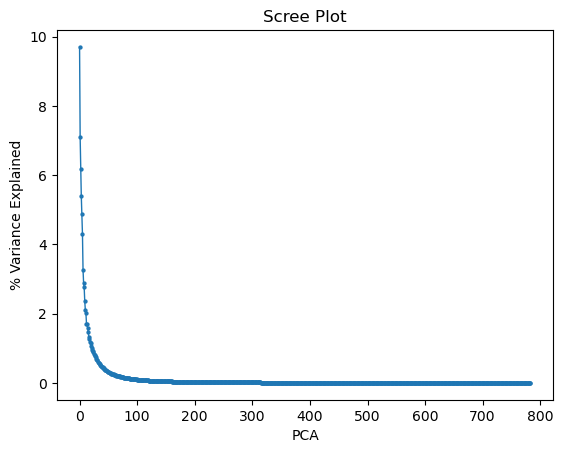

In [63]:
# SCREE PLOT
x = [i for i in range(len(variance_explained))]
plt.plot(x, variance_explained, 'o-', linewidth=1, markersize=2.1)

plt.title("Scree Plot")
plt.xlabel("PCA")
plt.ylabel("% Variance Explained")

plt.show()

In [38]:
target = 90

cusum = []

s = 0
for i in range(len(variance_explained)): 
    if s > target:
        cols = variance_explained[:i]
        break
        
    s += variance_explained[i]
    cusum.append(s)

print(f"{len(cols)} columns explain {int(s)}% of the variance in the data")

87 columns explain 90% of the variance in the data


In [39]:
eigen_vectors = eigen_vectors[:len(cols)]

<h4> Transform the Data using Eigen Vectors </h4>

In [40]:
print(f"{data.shape} x {eigen_vectors.T.shape}")

(60000, 784) x (784, 87)


In [61]:
data_transformed = np.dot(data, eigen_vectors.T)

print("Transformed Dataset's shape:", data_transformed.shape)

Transformed Dataset's shape: (60000, 87)


In [ ]:
# Save the Standard Scaler Object, and the Eigen Vector
# SO that you may 'scale' the input vector, and 'transform' it using Eigen Vector, and get prediction for it.